In [37]:
library(dplyr)
library(ggplot2)
library(tidyr)
players <- read.csv("data/players.csv", stringsAsFactors = FALSE)
sessions <- read.csv("data/sessions.csv", stringsAsFactors = FALSE)

## 1. Data Description

This project uses two datasets:

- **players.csv**  one row per player (demographics + gameplay summary)
- **sessions.csv** one row per play session (timestamps + durations)

Below is the structure, number of observations, and potential data issues.


In [55]:
head(players, 10)
head(sessions, 10)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Pro,1,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,1,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,0,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,1,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,1,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,1,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
7,Regular,1,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
8,Amateur,0,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
9,Amateur,1,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


,hashedEmail,start_time,end_time,original_start_time,original_end_time
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.720e+12,1.720e+12
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.719e+12,1.719e+12
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.722e+12,1.722e+12
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.722e+12,1.722e+12
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.717e+12,1.717e+12
6,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.719e+12,1.719e+12
7,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.713e+12,1.713e+12
8,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.727e+12,1.727e+12
9,96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.719e+12,1.719e+12


In [39]:
nrow(players)
ncol(players)

nrow(sessions)
ncol(sessions)

[1] 196

[1] 7

[1] 1535

[1] 5

In [56]:
summary(players)
summary(sessions)

  experience          subscribe     hashedEmail         played_hours   
 Length:196         Min.   :0.000   Length:196         Min.   :  0.00  
 Class :character   1st Qu.:0.000   Class :character   1st Qu.:  0.00  
 Mode  :character   Median :1.000   Mode  :character   Median :  0.10  
                    Mean   :0.735                      Mean   :  5.85  
                    3rd Qu.:1.000                      3rd Qu.:  0.60  
                    Max.   :1.000                      Max.   :223.10  
                                                                       
     name              gender               Age      
 Length:196         Length:196         Min.   : 9.0  
 Class :character   Class :character   1st Qu.:17.0  
 Mode  :character   Mode  :character   Median :19.0  
                                       Mean   :21.1  
                                       3rd Qu.:22.8  
                                       Max.   :58.0  
                                       NA's   

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.71e+12   
 Class :character   Class :character   Class :character   1st Qu.:1.72e+12   
 Mode  :character   Mode  :character   Mode  :character   Median :1.72e+12   
                                                          Mean   :1.72e+12   
                                                          3rd Qu.:1.72e+12   
                                                          Max.   :1.73e+12   
                                                                             
 original_end_time 
 Min.   :1.71e+12  
 1st Qu.:1.72e+12  
 Median :1.72e+12  
 Mean   :1.72e+12  
 3rd Qu.:1.72e+12  
 Max.   :1.73e+12  
 NA's   :2         

In [57]:
players$Age <- as.numeric(players$Age)
players$played_hours <- as.numeric(players$played_hours)
players$subscribe <- as.numeric(players$subscribe)

mean_Age <- mean(players$Age, na.rm = TRUE)
mean_played_hours <- mean(players$played_hours, na.rm = TRUE)
mean_subscribe <- mean(players$subscribe, na.rm = TRUE)

round(mean_Age, 2)
round(mean_played_hours, 2)
round(mean_subscribe, 2)

[1] 21.14

[1] 5.85

[1] 0.73

## 2. Questions

### Broad Question
What player behaviours and patterns are most predictive of long term engagement on the server?

### Specific Question

Can the total number of sessions and total played hours predict whether a player subscribes to the newsletter?

### Why this question?

Newsletter subscription shows a  deeper engagement with the project, and understanding whether this behaviours (like number of sessions and total hours played) predict subscription helps the research team identify players what factors and who are most likely to stay subscribed


## 3. Exploratory Data Analysis and Visualization

Below are basic visualizations to understand key variables related to my predictive question.


In [58]:
players_summary <- players %>%
  group_by(experience) %>%
  summarise(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    n_players = n()
  )

players_summary

experience,mean_played_hours,n_players
<chr>,<dbl>,<int>
Amateur,6.02,63
Beginner,1.25,35
Pro,2.60,14
Regular,18.21,36
Veteran,0.65,48


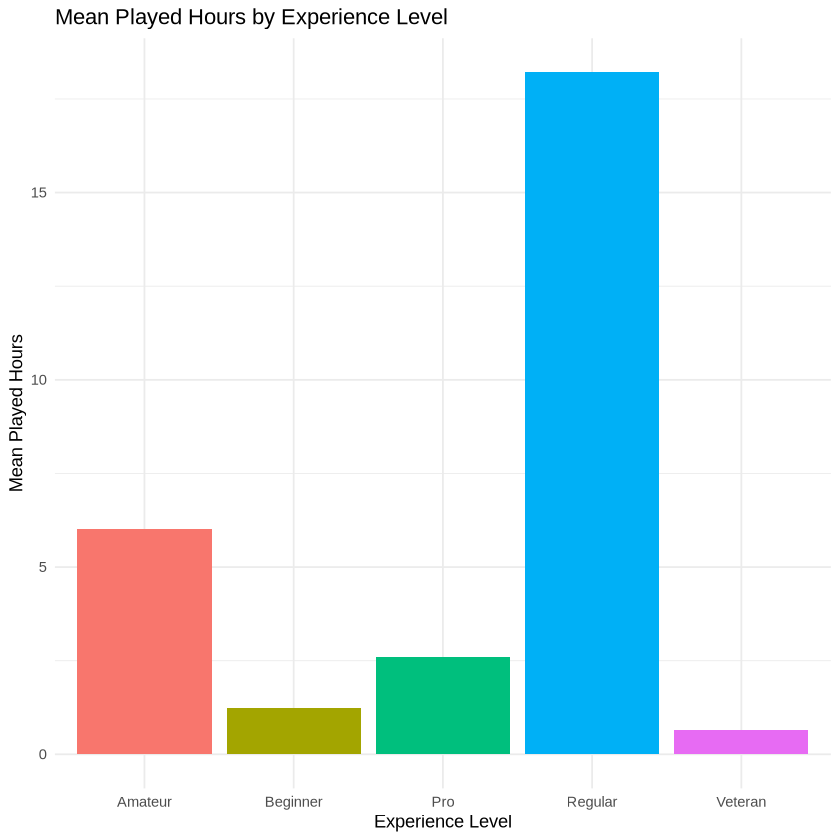

In [59]:
ggplot(players_summary, aes(x = experience, y = mean_played_hours, fill = experience)) +
  geom_col() +
  labs(title = "Mean Played Hours by Experience Level",
       x = "Experience Level",
       y = "Mean Played Hours") +
  theme_minimal() +
  theme(legend.position = "none")


### Comment:
More experienced players tend to have higher total played hours. This supports using both variables as predictors for newsletter subscription.


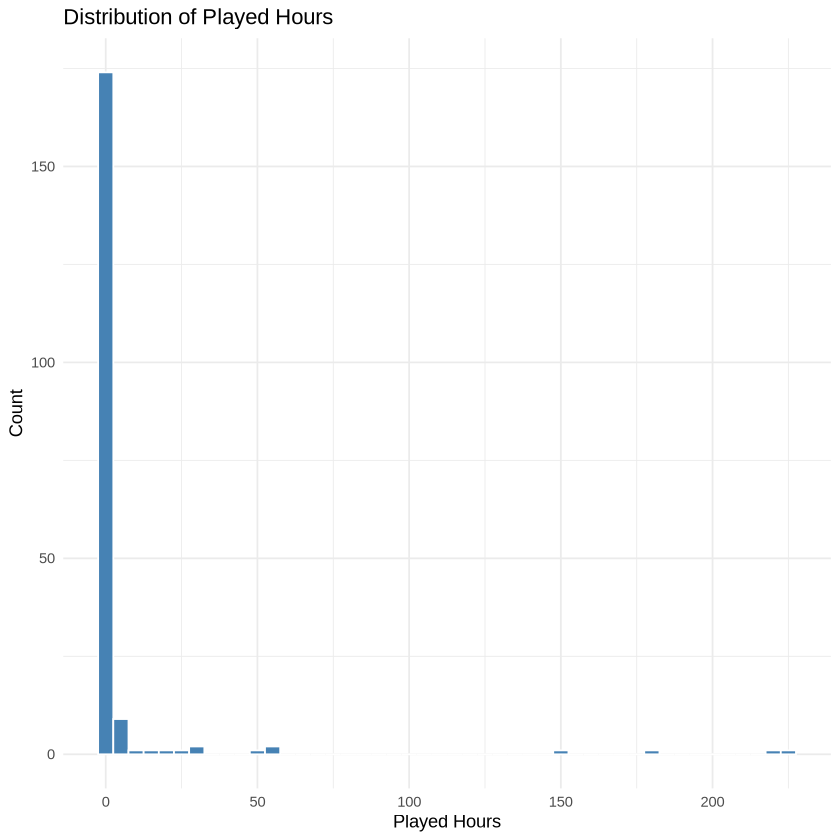

In [63]:
ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Played Hours", x = "Played Hours", y = "Count") +
  theme_minimal()

### Comment:
The distribution of played_hours is bad as most players have low hours. This suggests we may need to scale, depending on the model.


## 4. Methods and Plan

### Proposed Method
**k-Nearest Neighbors Classification**

### Why this method?
- Only uses basic concepts such as distance and similarity
- Does not require assumptions about linear relationships
- Simple and easy to understand

### Assumptions
- Players who have similar experience/played hours will behave similarly
- Variables are on similar scales (we will normalize them)
- No missing values in the predictors

### Possible Limitations
- Must normalize numeric variables so one does not dominate the distance 
- Does not automatically show which variable is “most important”
- kNN can be slower with large datasets

### Data Processing Plan
1. Clean newsletter variable (convert to numeric 0/1).
2. Remove rows with missing values in key columns.
3. Normalize numeric predictors: played_hours, Age
4. Convert experience to a numeric scale
5. Train-test split:  
   - **80% training**, **20% test**  
6. Choose values of k to test 
7. Fit kNN model using training data.
8. Interpret coefficients.  


## 5. GitHub Repository

My GitHub project repository (at least 5 commits with messages):

**<https://github.com/daniel-zouli/Dsci-100-Individual-Project.git>**